In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

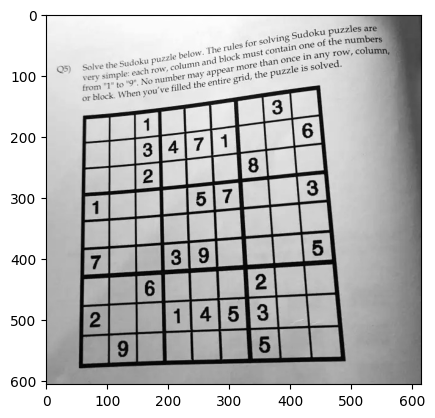

In [ ]:
img = cv2.imread("drive/MyDrive/sudoku_solver/sudoku.jpg")
plt.imshow(img)

In [ ]:
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# threshold_value = 150
# _, thresholded_image = cv2.threshold(grayscale_img, threshold_value, 1, cv2.THRESH_BINARY)
# print(thresholded_image.shape)

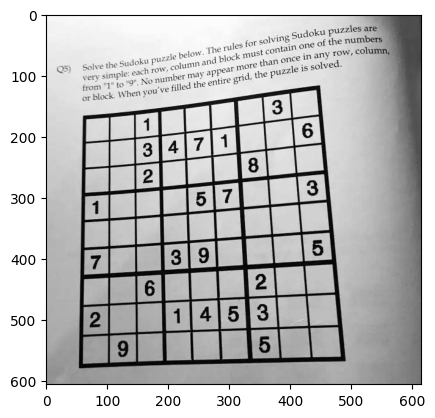

In [ ]:
plt.imshow(grayscale_img, cmap="gray")

In [ ]:
# cv2.imwrite("test.jpg", grayscale_img)

In [ ]:
# print(grayscale_img.shape)
# print(np.unique(grayscale_img))

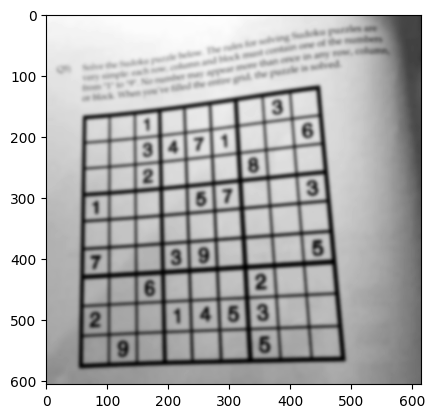

In [ ]:
blurred_img = cv2.GaussianBlur(grayscale_img, (15, 15), 0)
plt.imshow(blurred_img, cmap="gray")

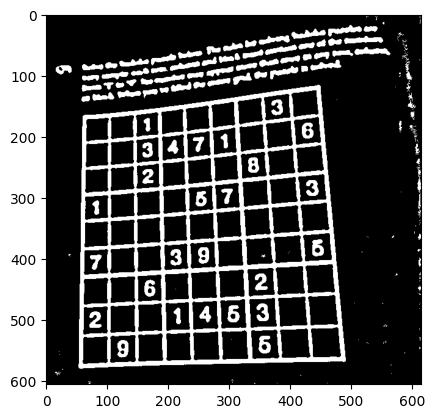

In [ ]:
"""
check this link to see the reference
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
from these 2 cell below u can see that using cv2.ADAPTIVE_THRESH_GAUSSIAN_C gives a better result
u also can visit the link above to see the result with different images
"""
# Perform adaptive thresholding
binarized_img = cv2.adaptiveThreshold(blurred_img, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Apply erosion followed by dilation
binarized_img = np.logical_not(binarized_img).astype(np.uint8)
plt.imshow(binarized_img, cmap="gray")

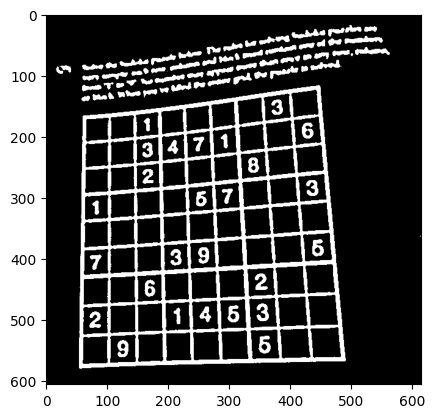

In [ ]:
# Perform adaptive thresholding
binarized_img = cv2.adaptiveThreshold(blurred_img, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# Apply erosion followed by dilation
binarized_img = np.logical_not(binarized_img).astype(np.uint8)
plt.imshow(binarized_img, cmap="gray")

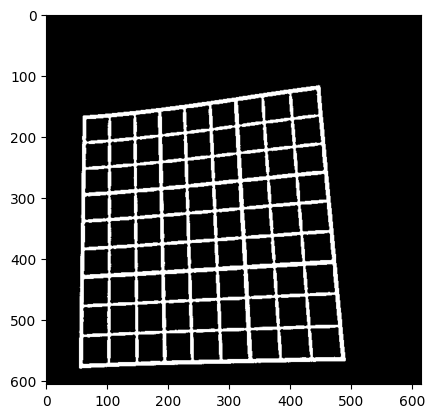

In [ ]:
num_labels, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(binarized_img, connectivity=8)

# Find the label of the largest connected component (excluding background label)
largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Create a mask for the largest component
largest_component_mask = (labeled_image == largest_component_label).astype(np.uint8)

# Apply the mask to get the largest connected component
largest_connected_component = cv2.bitwise_and(binarized_img, binarized_img, mask=largest_component_mask)
plt.imshow(largest_connected_component, cmap="gray")

In [ ]:
print(stats[54])


[242 111  19  11 147]


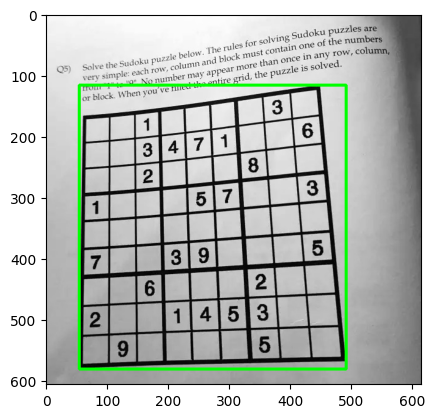

In [ ]:
copy = largest_connected_component.copy()
top_left = (stats[largest_component_label][0], stats[largest_component_label][1])
bottom_right = (stats[largest_component_label][0]+stats[largest_component_label][2], stats[largest_component_label][1]+stats[largest_component_label][3])

top_right = (stats[largest_component_label][0]+stats[largest_component_label][2], stats[largest_component_label][1])
bottom_left = (stats[largest_component_label][0],stats[largest_component_label][1]+stats[largest_component_label][3] )
color = (0,255,0)

# # Draw the rectangle
img = cv2.imread("drive/MyDrive/sudoku_solver/sudoku.jpg")
cv2.rectangle(img, top_left, bottom_right, color, thickness=3)
# plt.imshow(copy, cmap="gray")
# lets see the image, but in rgb view
plt.imshow(img)

In [ ]:
# i kinda forget why i need i think this cropped image, so its not used but the code is not deleted . idk why :)
# cropped_binarized_img = largest_connected_component.copy()[stats[54][1]:stats[54][1]+stats[54][3],stats[54][0]:stats[54][0]+stats[54][2]]
# plt.imshow(cropped_binarized_img, cmap="gray")

In [ ]:
# remember that the position return from below code is (y,x)
points = np.transpose(np.nonzero(largest_connected_component))
def get_nearest_point(target_point, points):
  """
  i know im a bit inconsistent about the sequence between x and y, and when im realized
  im a bit lazy to rewrite the code to right sequence

  target_point = (x,y)
  points = array of (y,x)
  """
  x = target_point[0]
  y = target_point[1]
  # print(x,y)

  # find the manhattan distance, i still a bit confused why manhattan is prefered compared to euclidian distance,
  # but because the reference told to do so , i choose manhattan. in my opinion the reason is maybe beacause of its less computation
  # i also googling they said it will be suitable for the pixel case like this

  manhattan = points - np.array([y,x])
  # print(manhattan[:5])
  manhattan = np.sum(np.abs(manhattan), axis=1)
  # print(manhattan[:5])
  # print(np.min(manhattan))
  index = np.where(manhattan==np.min(manhattan))[0][0]
  # print(index)
  # print(points[index])
  return list(points[index])

corner = []
corner.append(get_nearest_point(top_left,points))
corner.append(get_nearest_point(top_right,points))
corner.append(get_nearest_point(bottom_left,points))
corner.append(get_nearest_point(bottom_right,points))
print(corner)

[[166, 61], [117, 448], [579, 54], [567, 490]]


In [ ]:
print(f"{top_left}")      # [166  61]
print(f"{top_right}")     # [117 448]
print(f"{bottom_left}")   # [579  54]
print(f"{bottom_right}")  # [567 490]

(54, 116)
(491, 116)
(54, 581)
(491, 581)


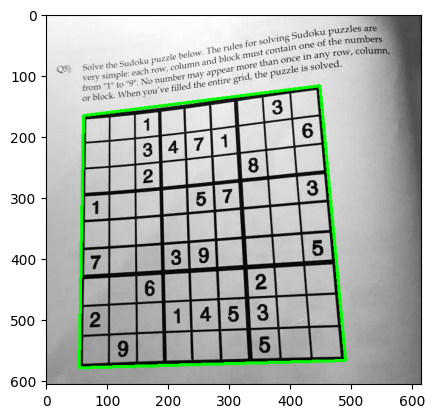

In [ ]:
image = cv2.imread("drive/MyDrive/sudoku_solver/sudoku.jpg")
cv2.line(image, corner[0][::-1],corner[1][::-1], (0, 255, 0), 3)
cv2.line(image, corner[1][::-1],corner[3][::-1], (0, 255, 0), 3)
cv2.line(image, corner[3][::-1],corner[2][::-1], (0, 255, 0), 3)
cv2.line(image, corner[2][::-1],corner[0][::-1], (0, 255, 0), 3)

plt.imshow(image)

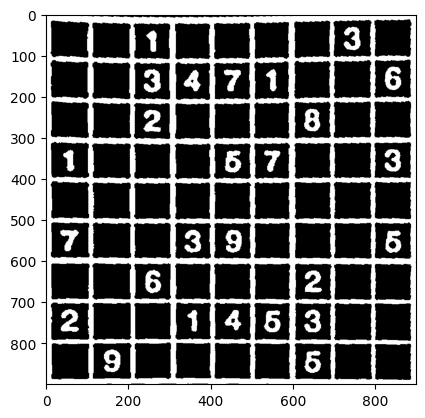

In [ ]:
# Define the destination points (desired coordinates after transformation)
# These points define the shape to which you want to warp the rectangle
# corner = [x[::-1] for x in corner]
source_points = np.float32([x[::-1] for x in corner])
destination_points = np.float32([[0, 0], [900, 0], [0, 900], [900, 900]])

# Calculate the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(source_points, destination_points)

# Perform the perspective warp
warped_image = cv2.warpPerspective(binarized_img, perspective_matrix, (900,900))
plt.imshow(warped_image, cmap="gray")
# warped_image = cv2.warpPerspective(image, perspective_matrix, (900,900))
# plt.imshow(warped_image)